<a href="https://colab.research.google.com/github/MassiveTortoise/DataScience-AI-FinalProject/blob/main/22229021MM_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Toxicity Detection Project**

# Model description:
This model we used is a fine-tuned version of the DistilBERT model to classify toxic comments.

**Limitations and Bias:**
This model is intended to be used for classifying toxic online classifications. However, one limitation of the model is that it performs poorly for some comments that mention a specific identity subgroup, like Muslims. The following table shows an evaluation score for different identity groups. You can learn the specific meaning of these metrics here. Those metrics show how well a model performs for a specific group. The larger the number, the better.


In [ ]:
!pip install transformers datasets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="martin-ha/toxic-comment-model")

config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
sequence_to_classify = 'The BC "Fiberals" are desparate to get the pork barrel back. Shameless!'
pipe(sequence_to_classify)

[{'label': 'non-toxic', 'score': 0.7999280691146851}]

In [ ]:
import pandas as pd
splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}
df = pd.read_json("hf://datasets/SetFit/toxic_conversations_50k/" + splits["train"], lines=True)

In [ ]:
df

,text,label,label_text
0,theres not enough going on around here for air...,0,not toxic
1,How about ZERO,0,not toxic
2,Her name is still floating? Might I suggest f...,0,not toxic
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,0,not toxic
4,"Nobody awake on the bridge, no lookouts ,,no r...",0,not toxic
...,...,...,...
49995,Offensive is in the eye of the beholder. If on...,0,not toxic
49996,I have been a party to many hiring meetings a...,0,not toxic
49997,"Sorry, Venezuelan's got themselves into this m...",1,toxic
49998,It appears you'd feel more comfortable in a mo...,0,not toxic


In [ ]:
df.columns

Index(['text', 'label', 'label_text'], dtype='object')

In [ ]:
df.shape

(50000, 3)

In [ ]:
df['label_text'].value_counts()

,count
label_text,
not toxic,46035
toxic,3965


In [ ]:
df.head(10)

,text,label,label_text
0,theres not enough going on around here for air...,0,not toxic
1,How about ZERO,0,not toxic
2,Her name is still floating? Might I suggest f...,0,not toxic
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,0,not toxic
4,"Nobody awake on the bridge, no lookouts ,,no r...",0,not toxic
5,Pessimist's might say that we the US will have...,0,not toxic
6,I'm sure Hawaiian can put Southwest out of bus...,0,not toxic
7,"States don't grow economies, cities grow econo...",0,not toxic
8,What makes Magnitsky so special? Countless tho...,0,not toxic
9,"The Mayor said we need ""more skin in the game""...",0,not toxic


In [ ]:
df.head(5000)['label_text'].value_counts()

,count
label_text,
not toxic,4583
toxic,417


## Preprocessing the data

In [ ]:
# General dataset information
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("Number of Duplicate Rows:", df.duplicated().sum())


Dataset Shape: (50000, 3)
Columns: Index(['text', 'label', 'label_text'], dtype='object')
Missing Values:
 text          0
label         0
label_text    0
dtype: int64
Number of Duplicate Rows: 100


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)
print("Dataset Shape After Removing Duplicates:", df.shape)
print("Number of Duplicate Rows:", df.duplicated().sum())

Dataset Shape After Removing Duplicates: (49900, 3)
Number of Duplicate Rows: 0


In [ ]:
import re

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Preview cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,theres not enough going on around here for air...,theres not enough going on around here for air...
1,How about ZERO,how about zero
2,Her name is still floating? Might I suggest f...,her name is still floating might i suggest fl...
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,stop by so cold at mfnwproject pabst itll make...
4,"Nobody awake on the bridge, no lookouts ,,no r...",nobody awake on the bridge no lookouts no rada...


# EDA:

In [ ]:
# Label distribution
label_distribution = df['label'].value_counts(normalize=True) * 100
print("Label Distribution:\n", label_distribution)

# Text length statistics
df['text_length'] = df['text'].apply(len)
print("Text Length Statistics:\n", df['text_length'].describe())


Label Distribution:
 label
0    92.056112
1     7.943888
Name: proportion, dtype: float64
Text Length Statistics:
 count    49900.000000
mean       299.286273
std        270.072584
min          1.000000
25%         95.000000
50%        205.000000
75%        415.000000
max       1000.000000
Name: text_length, dtype: float64


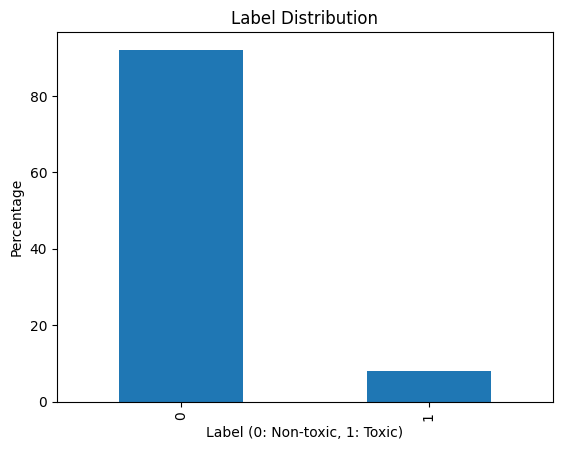

In [ ]:
import matplotlib.pyplot as plt

# Plot label distribution
label_distribution.plot(kind='bar', title="Label Distribution")
plt.xlabel("Label (0: Non-toxic, 1: Toxic)")
plt.ylabel("Percentage")
plt.show()


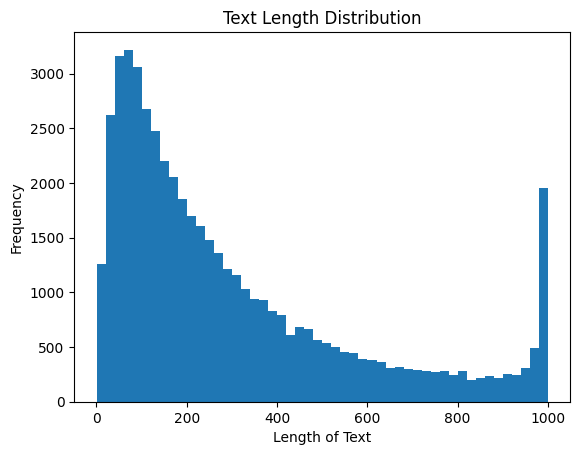

In [ ]:
# Plot text length distribution
plt.hist(df['text_length'], bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()


# Implementing model:

In [ ]:
df_5000 = df.head(5000)

In [ ]:
df_5000

,text,label,label_text,cleaned_text
0,theres not enough going on around here for air...,0,not toxic,theres not enough going on around here for air...
1,How about ZERO,0,not toxic,how about zero
2,Her name is still floating? Might I suggest f...,0,not toxic,her name is still floating might i suggest fl...
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,0,not toxic,stop by so cold at mfnwproject pabst itll make...
4,"Nobody awake on the bridge, no lookouts ,,no r...",0,not toxic,nobody awake on the bridge no lookouts no rada...
...,...,...,...,...
4995,"I would bet that the judge has insurance, in w...",0,not toxic,i would bet that the judge has insurance in wi...
4996,"""the end game for him is to undo everything Ob...",0,not toxic,the end game for him is to undo everything oba...
4997,"Like the Ayatollah Khomenei, he's ""gone where ...",0,not toxic,like the ayatollah khomenei hes gone where the...
4998,This should be the headline:\n\nThe Neighborho...,0,not toxic,this should be the headline\n\nthe neighborhoo...


In [ ]:
df_5000 = df_5000.reset_index(drop=True)

In [ ]:
result = pipe(df_5000['text'].tolist())

KeyboardInterrupt: 

In [ ]:
result

[{'label': 'non-toxic', 'score': 0.9984132051467896},
 {'label': 'non-toxic', 'score': 0.9985430240631104},
 {'label': 'non-toxic', 'score': 0.9974778294563293},
 {'label': 'non-toxic', 'score': 0.9980531930923462},
 {'label': 'non-toxic', 'score': 0.997047483921051},
 {'label': 'non-toxic', 'score': 0.9945608973503113},
 {'label': 'non-toxic', 'score': 0.9991028308868408},
 {'label': 'non-toxic', 'score': 0.9987772107124329},
 {'label': 'non-toxic', 'score': 0.998826801776886},
 {'label': 'non-toxic', 'score': 0.9987772107124329},
 {'label': 'non-toxic', 'score': 0.9992133378982544},
 {'label': 'non-toxic', 'score': 0.990860104560852},
 {'label': 'non-toxic', 'score': 0.9939210414886475},
 {'label': 'non-toxic', 'score': 0.9948693513870239},
 {'label': 'non-toxic', 'score': 0.8361322283744812},
 {'label': 'non-toxic', 'score': 0.9983375072479248},
 {'label': 'non-toxic', 'score': 0.997778594493866},
 {'label': 'non-toxic', 'score': 0.9927526712417603},
 {'label': 'non-toxic', 'score':

In [ ]:
# Assuming 'result' is your list of dictionaries
import pandas as pd

data = []
for entry in result:
    # Check if 'score' is iterable
    if isinstance(entry['score'], (list, tuple)):
        # Find the label with score > 0.5
        label = None
        score = None
        for l, s in zip(entry['label'], entry['score']):
            if s > 0.5:
                label = l
                score = s
                break  # Stop after finding the first label with score > 0.5

        # Append to data list
        data.append({
            'label': label,
            'score': score
        })
    else:  # Handle cases where 'score' is a single float
        label = entry['label']
        score = entry['score'] if entry['score'] > 0.5 else None  # Assign score if > 0.5, else None
        data.append({
            'label': label,
            'score': score
        })

# Convert to DataFrame
predicteddata = pd.DataFrame(data)

predicteddata['text'] = df_5000['text']

predicteddata


,label,score,text
0,non-toxic,0.998413,theres not enough going on around here for air...
1,non-toxic,0.998543,How about ZERO
2,non-toxic,0.997478,Her name is still floating? Might I suggest f...
3,non-toxic,0.998053,Stop by So Cold at MFNW/Project Pabst! It'll m...
4,non-toxic,0.997047,"Nobody awake on the bridge, no lookouts ,,no r..."
...,...,...,...
4995,non-toxic,0.998095,"I would bet that the judge has insurance, in w..."
4996,non-toxic,0.992669,"""the end game for him is to undo everything Ob..."
4997,non-toxic,0.991087,"Like the Ayatollah Khomenei, he's ""gone where ..."
4998,non-toxic,0.999070,This should be the headline:\n\nThe Neighborho...


In [ ]:
dataset = pd.DataFrame()
dataset['true_label'] = df_5000['label_text']
dataset['label'] = predicteddata['label']
dataset['score'] = predicteddata['score']
dataset

,true_label,label,score
0,not toxic,non-toxic,0.998413
1,not toxic,non-toxic,0.998543
2,not toxic,non-toxic,0.997478
3,not toxic,non-toxic,0.998053
4,not toxic,non-toxic,0.997047
...,...,...,...
4995,not toxic,non-toxic,0.998095
4996,not toxic,non-toxic,0.992669
4997,not toxic,non-toxic,0.991087
4998,not toxic,non-toxic,0.999070


In [ ]:
# Replace labels with binary values using lambda functions
true_labels = dataset['true_label'].apply(lambda x: 0 if x == 'not toxic' else 1)
predicted_labels = dataset['label'].apply(lambda x: 0 if x == 'non-toxic' else 1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy true_labels, predicted_labels
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy:", accuracy*100,'%')

Accuracy: 94.17999999999999 %


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4518   65]
 [ 226  191]]


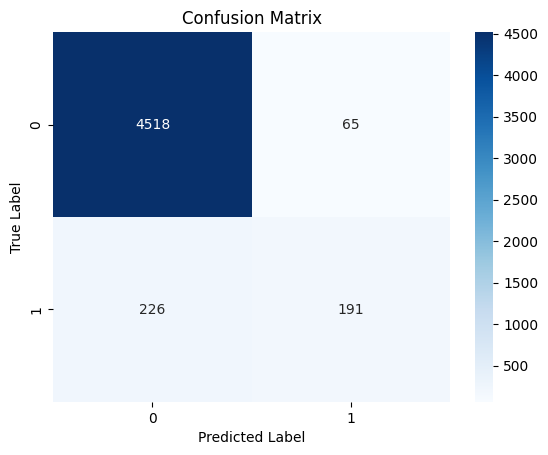

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 5. Bonus?

Limit Dataframe to 100 Entries

In [ ]:
from transformers import pipeline

import pandas as pd

# Load the dataset
splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}
df = pd.read_json("hf://datasets/SetFit/toxic_conversations_50k/" + splits["train"], lines=True)

# Limit the dataframe to the first 100 entries
df_100 = df.head(100)

# Load the sentiment analysis pipeline
# Specify the task as "text-classification" and the model as "unitary/unbiased-toxic-roberta"
sentiment_pipe = pipeline("text-classification", model="unitary/unbiased-toxic-roberta")

# Apply the sentiment analysis to the texts
df_100['sentiment'] = df_100['text'].apply(lambda x: sentiment_pipe(x)[0]['label'])


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

<ipython-input-30-095f167274da>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['sentiment'] = df_100['text'].apply(lambda x: sentiment_pipe(x)[0]['label'])


In [ ]:
df_100

,text,label,label_text,sentiment
0,theres not enough going on around here for air...,0,not toxic,toxicity
1,How about ZERO,0,not toxic,toxicity
2,Her name is still floating? Might I suggest f...,0,not toxic,toxicity
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,0,not toxic,toxicity
4,"Nobody awake on the bridge, no lookouts ,,no r...",0,not toxic,male
...,...,...,...,...
95,This is different this time.\nThey know better...,0,not toxic,toxicity
96,You first. You want the guns. People like yo...,0,not toxic,toxicity
97,What is most important is that he be independe...,1,toxic,toxicity
98,Did you even bother to listen to it or were yo...,0,not toxic,toxicity


In [ ]:
import pandas as pd
from transformers import pipeline
from datasets import load_dataset

# Step 1: Load and limit the dataset
dataset = load_dataset("SetFit/toxic_conversations_50k", split='train')
df = pd.DataFrame(dataset)
df = df.head(100)

# Step 2: Apply sentiment analysis
sentiment_analyzer = pipeline("text-classification", model="unitary/unbiased-toxic-roberta")
df['sentiment'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Step 3: Apply toxicity detection
toxicity_analyzer = pipeline(
    "text-classification",
    model="unitary/unbiased-toxic-roberta",
    tokenizer="unitary/unbiased-toxic-roberta",
    function_to_apply='sigmoid',
    return_all_scores=True
)
toxicity_labels = ["toxicity", "severe_toxicity", "obscene", "identity_attack", "insult", "threat", "sexual_explicit"]

def get_toxicity_scores(text):
    outputs = toxicity_analyzer(text)[0]
    scores = {output['label']: output['score'] for output in outputs}
    return scores

df['toxicity_scores'] = df['text'].apply(get_toxicity_scores)

# Step 4: Expand toxicity scores into separate columns
toxicity_df = df['toxicity_scores'].apply(pd.Series)
toxicity_df = toxicity_df[toxicity_labels]
df = pd.concat([df, toxicity_df], axis=1)
df.drop(columns=['toxicity_scores'], inplace=True)

# Step 5: Apply thresholds to toxicity scores
threshold = 0.5

def apply_threshold(score):
    return 'toxic' if score >= threshold else 'not toxic'

for label in toxicity_labels:
    df[label + '_label'] = df[label].apply(apply_threshold)

# Step 6: View final results
result_columns = ['text', 'sentiment'] #+ [label + '_label' for label in toxicity_labels]
df[result_columns]


Repo card metadata block was not found. Setting CardData to empty.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


,text,sentiment
0,theres not enough going on around here for air...,toxicity
1,How about ZERO,toxicity
2,Her name is still floating? Might I suggest f...,toxicity
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,toxicity
4,"Nobody awake on the bridge, no lookouts ,,no r...",male
...,...,...
95,This is different this time.\nThey know better...,toxicity
96,You first. You want the guns. People like yo...,toxicity
97,What is most important is that he be independe...,toxicity
98,Did you even bother to listen to it or were yo...,toxicity


ed81a18cf89fdd481c12faad186ea0ad1f77b5b3